In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [33]:
def plot_channel_data(csv_path, target_channel):
    """
    Plots the Log Calibration Temperature over time for a specific frequency channel.
    
    Args:
        csv_path (str): Path to the CSV file generated by the digitizer.
        target_channel (str or float): The frequency channel to plot (e.g., "0.110" or 0.11).
    """
    try:
        # Load the data
        df = pd.read_csv(csv_path)
        
        # Normalize channel input and column to strings to ensure matching works
        # (Handles cases where input is float 0.11 but CSV has "0.110")
        target_channel = str(target_channel)
        df['Channel_Freq'] = df['Channel_Freq'].astype(str)
        
        # Filter data
        channel_data = df[df['Channel_Freq'] == target_channel].copy()
        
        if channel_data.empty:
            print(f"No data found for channel '{target_channel}'.")
            print(f"Available channels in this file: {sorted(df['Channel_Freq'].unique())}")
            return
        
        # Convert Actual_Time string to datetime objects for plotting
        # Errors='coerce' will turn 'N/A' strings into NaT (Not a Time) which plot skips
        channel_data['Actual_Time'] = pd.to_datetime(channel_data['Actual_Time'], errors='coerce')
        
        # Drop any rows where time conversion failed
        channel_data = channel_data.dropna(subset=['Actual_Time'])
        
        # Create the plot
        plt.figure(figsize=(14, 6))
        
        plt.scatter(channel_data['Actual_Time'], channel_data['Log_Cal_Temp'], 
                 marker='o', linestyle='-', color='b', alpha=0.7, label=f'{target_channel} MHz',s=3)
        
        # Formatting
        plt.title(f"Radio Astronomy Data | Receiver: {df['Receiver'].iloc[0]} | Channel: {target_channel} MHz", fontsize=14)
        plt.xlabel("Time (UTC)", fontsize=12)
        plt.ylabel("Log Calibration Temperature", fontsize=12)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
        
        # Format x-axis dates nicely (Hour:Minute)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.gcf().autofmt_xdate() # Rotate dates slightly for readability
        
        plt.legend()
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{csv_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

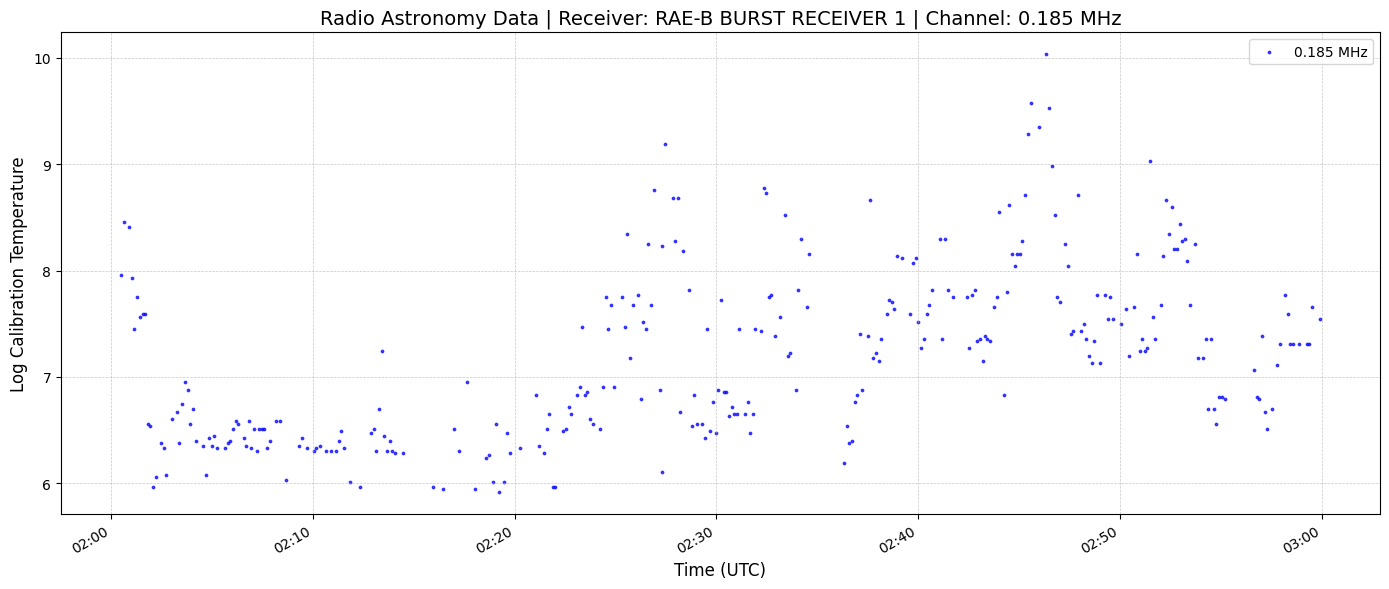

In [34]:
plot_channel_data('extracted_1975-5-3.csv','0.185')  # Example usage